# Data fetching from V1DD physiology data set
## Using the `OPhysClient`
## Basic

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from allen_v1dd.client import OPhysClient, OPhysSession

%load_ext autoreload
%autoreload 2

### The data set is saved on a network share. The description of the content can be found [here](https://github.com/AllenInstitute/v1dd_physiology/blob/main/v1dd_physiology/meta/database_description.md).

In [2]:
# Windows
# base_folder = r"\\allen\programs\mindscope\workgroups\surround\v1dd_in_vivo_new_segmentation\data"

# Linux and macOS
# base_folder = "/allen/programs/mindscope/workgroups/surround/v1dd_in_vivo_new_segmentation/data"
# base_folder = "/Volumes/programs/mindscope/workgroups/surround/v1dd_in_vivo_new_segmentation/data"
base_folder = "/Users/chase/Desktop/test_v1dd_data"
client = OPhysClient(base_folder)

### List all the imaging sessions in the data set
Imaging session name is organized as 10-character string with structure `M{mouse_id}_{column_id}{volumn_id}`. For example: `M409828_11`.
There are 5 columns (1 through 5), and for each column, multiple volumes were imaged at different cortical depth. Volume 1 - 5 were two-photon ("DeepScope") sessions with simulantously imaged 6 imaging planes (16 um apart from each other). So each two-photon volume expands 16 * 6 = 96 um in cortical depth. Volume 6 - f were three-photon single plane sessions in deeper depth. Adjacent three-photon planes were 25 microns apart. Only the central column has three-photon sessions. 

In [3]:
client.get_all_session_ids()

['M409828_11',
 'M409828_12',
 'M409828_13',
 'M409828_14',
 'M409828_15',
 'M409828_16',
 'M409828_17',
 'M409828_18',
 'M409828_19',
 'M409828_1a',
 'M409828_1b',
 'M409828_1c',
 'M409828_1d',
 'M409828_1e',
 'M409828_1f']

### Select one session

In [4]:
mouse = 409828
col = 1
vol = 3

### Load the session

In [5]:
sess = client.load_ophys_session(mouse=mouse, column=col, volume=vol)
print(f"Loaded ophys session {sess.get_session_id()} (mouse {sess.get_mouse_id()}, column {sess.get_column_id()}, volume {sess.get_volume_id()})")

Loaded ophys session M409828_13 (mouse 409828, column 1, volume 3)


In [6]:
stim_table, stim_meta = sess.get_stimulus_table("drifting_gratings_windowed")
print(stim_meta)
stim_table

{'temporal_frequency': 1.0, 'contrast': 0.8, 'duration': 2, 'padding': 1.0, 'num_samples': 192, 'n_trials': 8, 'center_position': (-12.4, -8.9), 'radius': 15.0}


,start,end,temporal_frequency,spatial_frequency,direction
0,344.876038,346.861023,1.0,0.04,330.0
1,347.878540,349.863525,1.0,0.08,0.0
2,350.881042,352.865967,NaN,NaN,NaN
3,353.883514,355.868500,1.0,0.04,90.0
4,356.886017,358.871033,1.0,0.08,120.0
...,...,...,...,...,...
187,2687.826904,2689.812012,1.0,0.04,330.0
188,2690.829590,2692.814453,1.0,0.04,270.0
189,2693.832031,2695.816895,1.0,0.08,300.0
190,2696.834473,2698.819580,1.0,0.04,180.0


In [7]:
stim_table, stim_meta = sess.get_stimulus_table("natural_images_12")
stim_table

,start,end,image,image_index
0,1179.571167,1179.871460,0,29
1,1179.888062,1180.188354,1,4
2,1180.204956,1180.505249,2,23
3,1180.521973,1180.822266,3,32
4,1180.838867,1181.139160,4,9
...,...,...,...,...
475,1330.113159,1330.413452,7,62
476,1330.430176,1330.730347,8,27
477,1330.747070,1331.047241,9,6
478,1331.064087,1331.364258,10,2


In [8]:
start_time = stim_table.start.values[0]
end_time = stim_table.end.values[100]
print(f"start={start_time:.2f}, end={end_time:.2f}")

start=1179.57, end=1211.56


In [9]:
plane = 1
dff_traces = sess.get_traces(plane=plane, trace_type="dff")
dff_traces

<xarray.DataArray 'dff_traces' (roi: 1234, time: 21616)>
array([[0.42380401, 0.37287766, 0.48394495, ..., 0.15319468, 0.05466144,
        0.0646693 ],
       [0.24761494, 0.02103203, 0.14381145, ..., 0.13200676, 0.267653  ,
        0.00586273],
       [0.59060085, 0.15092514, 0.19300096, ..., 0.21971689, 0.14789656,
        0.03110218],
       ...,
       [0.08347795, 0.03853826, 0.19946817, ..., 0.31406924, 0.23882471,
        0.06320939],
       [0.        , 0.20213506, 0.5401039 , ..., 0.2769976 , 0.08111586,
        0.5915004 ],
       [0.0033764 , 0.12841807, 0.32171044, ..., 0.13600585, 0.28479016,
        0.08935268]], dtype=float32)
Coordinates:
  * roi      (roi) int64 0 1 2 3 4 5 6 7 ... 1227 1228 1229 1230 1231 1232 1233
  * time     (time) float64 0.132 0.296 0.4611 ... 3.57e+03 3.57e+03 3.571e+03

Text(0, 0.5, 'DF/F for ROI 12')

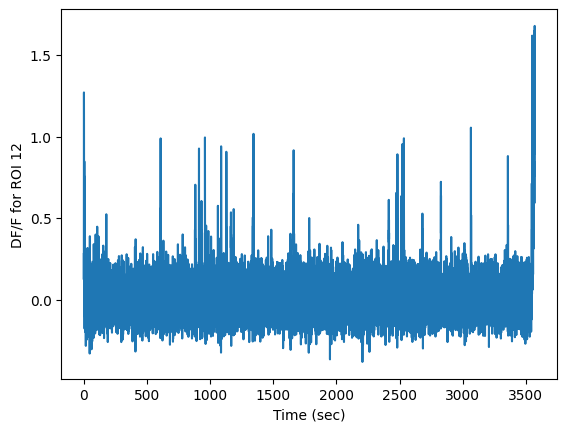

In [10]:
# Plot traces for a given ROI
roi = 12
roi_traces = dff_traces.sel(roi=roi)
plt.plot(roi_traces.time, roi_traces)
plt.xlabel("Time (sec)")
plt.ylabel(f"DF/F for ROI {roi}")

Text(0, 0.5, 'DF/F for ROI 12')

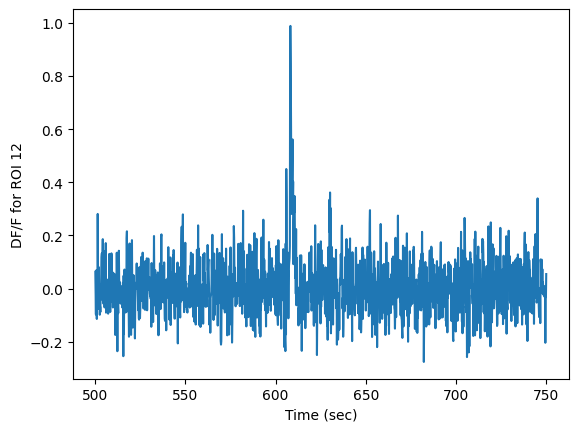

In [11]:
# Zoom into a given section
roi = 12
start, end = 500, 750
roi_traces = dff_traces.sel(roi=roi, time=slice(start, end))

plt.plot(roi_traces.time, roi_traces)
plt.xlabel("Time (sec)")
plt.ylabel(f"DF/F for ROI {roi}")

### From the file object get the LIMS session id 

In [12]:
sess.get_lims_session_id()

'794964451'

### From the file object get the scope type
 * '2p' : two-photon session
 * '3p' : three-photon session

In [13]:
sess.get_scope_type()

'2p'

### From the file object get the surface vasculature map
 * type='wf' : widefield map
 * type='mp' : multi-photon map
 * is_standard=False : original orientation
 * is_standard=True : standard orientation that matches the ISI map

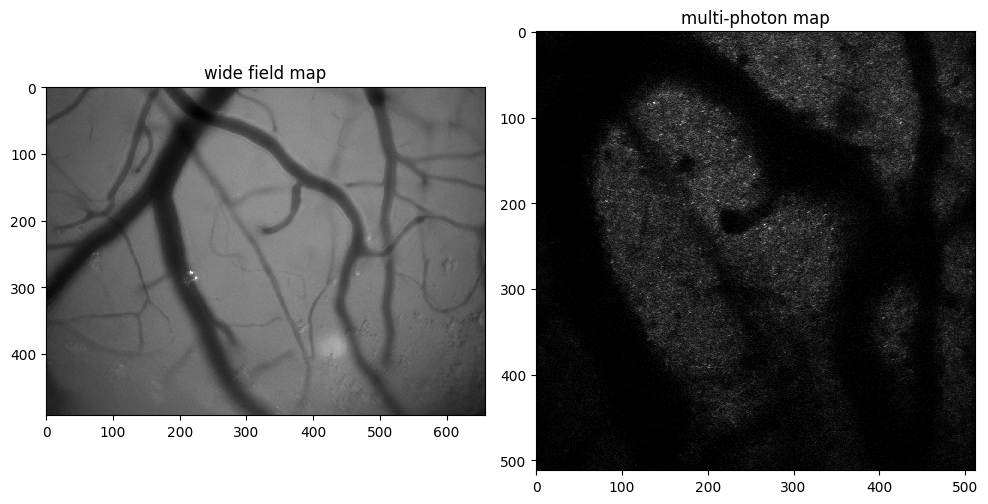

In [14]:
vasmap_wf = sess.get_vasculature_map(type='wf', is_standard=False)
vasmap_mp = sess.get_vasculature_map(type='mp', is_standard=False)

fig, axs = plt.subplots(ncols=2, nrows=1, figsize=(10, 5))
axs[0].imshow(vasmap_wf, cmap='gray', interpolation='nearest')
axs[0].set_title('wide field map')
axs[1].imshow(vasmap_mp, cmap='gray', interpolation='nearest')
axs[1].set_title('multi-photon map')
fig.tight_layout()

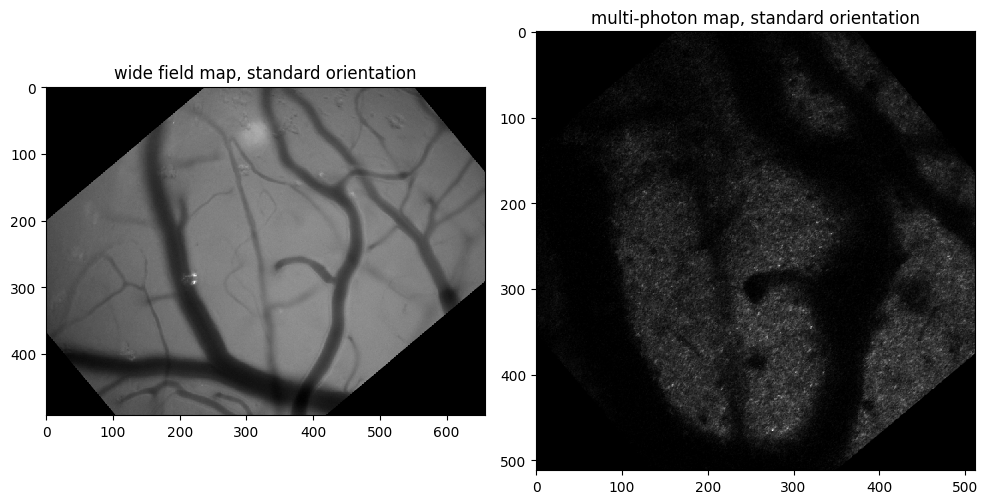

In [15]:
vasmap_wf = sess.get_vasculature_map(type='wf', is_standard=True)
vasmap_mp = sess.get_vasculature_map(type='mp', is_standard=True)

fig, axs = plt.subplots(ncols=2, nrows=1, figsize=(10, 5))
axs[0].imshow(vasmap_wf, cmap='gray', interpolation='nearest')
axs[0].set_title('wide field map, standard orientation')
axs[1].imshow(vasmap_mp, cmap='gray', interpolation='nearest')
axs[1].set_title('multi-photon map, standard orientation')
fig.tight_layout()

### From the file object, get a list of imaging plane names
The name of each imaging plane is a 6-character string, e.g. 'plane0'. Each two-photon session has 6 planes, 'plane0' to 'plane5' with increasing cortical depth. Each three-photon session has only one plane, 'plane0'.

In [16]:
print("Imaging planes:")
for plane in sess.get_planes():
    print(f"  {plane} [LIMS experiment {sess.get_lims_experiment_id(plane)}]")
    print(f"    - Imaging depth: {sess.get_plane_depth(plane)} µm")
    n_roi_tot = len(sess.get_rois(plane))
    n_roi_conf = np.count_nonzero(sess.is_roi_valid(plane))
    print(f"    - Number ROIs: {n_roi_conf}/{n_roi_tot} ({n_roi_conf/n_roi_tot*100:.0f}%) valid")

Imaging planes:
  1 [LIMS experiment 795018590]
    - Imaging depth: 242 µm
    - Number ROIs: 409/1234 (33%) valid
  2 [LIMS experiment 795018579]
    - Imaging depth: 258 µm
    - Number ROIs: 470/1222 (38%) valid
  3 [LIMS experiment 795018568]
    - Imaging depth: 274 µm
    - Number ROIs: 483/1482 (33%) valid
  4 [LIMS experiment 795018557]
    - Imaging depth: 290 µm
    - Number ROIs: 478/1279 (37%) valid
  5 [LIMS experiment 795018546]
    - Imaging depth: 306 µm
    - Number ROIs: 438/1158 (38%) valid
  6 [LIMS experiment 795018534]
    - Imaging depth: 322 µm
    - Number ROIs: 430/1148 (37%) valid


### Select one imaging plane

In [17]:
plane = sess.get_planes()[1]

### From the file object and the plane name, give the LIMS experiment id.
LIMS assign an unique experiment id (9-character string) to every single imaging plane. This id is very important to locate the raw data in LIMS. 

In [18]:
exp_id = sess.get_lims_experiment_id(plane)
exp_id

'795018579'

### From the file object and the plane name, get the mean, max, and correlation projections of this imaging plane
For roi segmentation the raw multi-photon movie was motion corrected and then denoised using [DeepInterpolation](https://github.com/AllenInstitute/deepinterpolation). The projections stored in the nwb files are fromthe motion-corrected raw movies and motion-corrected denoised movies.

 * proj_raw_mean : mean projection of the raw movie
 * proj_raw_max : max projection of the raw movie
 * proj_de_mean : mean projection of denoised movie
 * proj_de_max : max projection of denoised movie
 * proj_de_corr : correlation projection of denoised movie

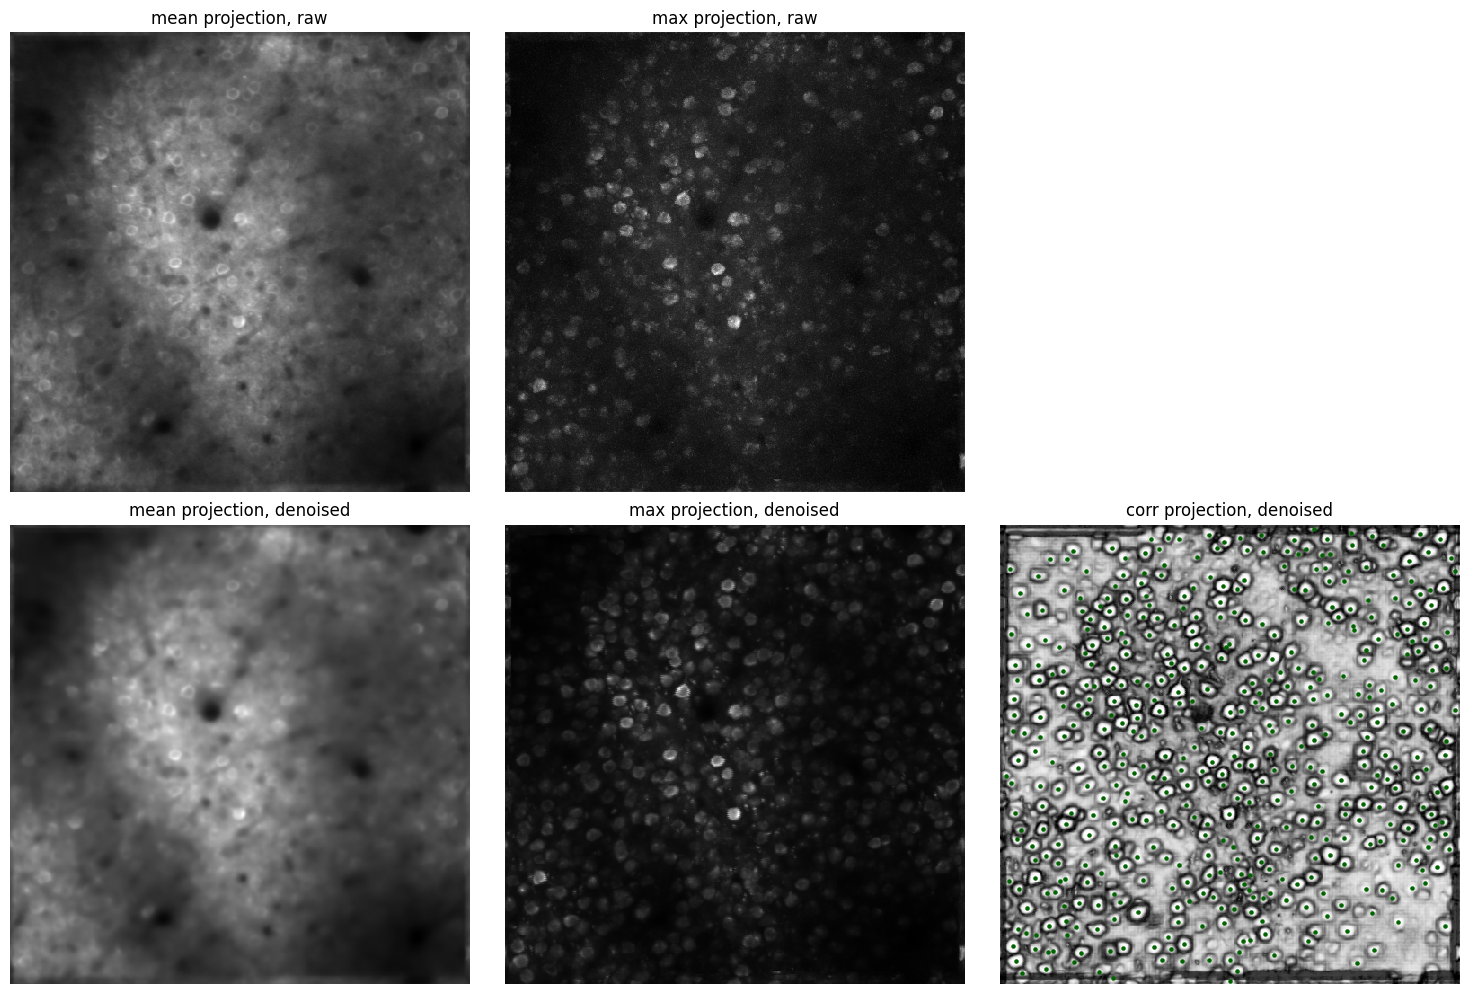

In [19]:
proj_raw_mean, proj_raw_max, proj_de_mean, proj_de_max, proj_de_corr = sess.get_plane_projection_images(plane)

fig, axs = plt.subplots(ncols=3, nrows=2, figsize=(15, 10))
axs[0, 0].imshow(proj_raw_mean, cmap='gray', interpolation='nearest')
axs[0, 0].set_title('mean projection, raw')
axs[0, 1].imshow(proj_raw_max, cmap='gray', interpolation='nearest')
axs[0, 1].set_title('max projection, raw')
axs[1, 0].imshow(proj_de_mean, cmap='gray', interpolation='nearest')
axs[1, 0].set_title('mean projection, denoised')
axs[1, 1].imshow(proj_de_max, cmap='gray', interpolation='nearest')
axs[1, 1].set_title('max projection, denoised')
axs[1, 2].imshow(proj_de_corr, cmap='gray', interpolation='nearest')
axs[1, 2].set_title('corr projection, denoised')

for roi in sess.get_rois(plane):
    valid = sess.is_roi_valid(plane, roi)
    if valid:
        mask = sess.get_roi_image_mask(plane, roi)
        centroid_y, centroid_x = np.mean(np.where(sess.get_roi_image_mask(plane, roi)), axis=1)
        axs[1, 2].scatter(centroid_x, centroid_y, color=("darkgreen" if valid else "red"), s=5, alpha=(1 if valid else 0.2))


for ax in axs.flat:
    ax.set_axis_off()

fig.tight_layout()

### From the file object and the plane name, list all the roi names in this imaging plane

The roi names are 8-character strings with format 'roi_{roi_index}', e.g. 'roi_0000'. So the session_name + plane_name + roi_name defines an unique roi.  
Please note that the roi index is continuous, which can be used as index to retrive calcium traces from traces matrix (see below).

In [20]:
rois = sess.get_rois(plane)
print(f'there are {len(rois)} in plane {plane} of session: {sess.get_session_id()}:')
print('\nfirst 100 rois:\n')
print(rois[0:100])

there are 1222 in plane 2 of session: M409828_13:

first 100 rois:

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]


### From the file object and the plane name, list all the pika roi ids in this imaging plane
As stated above each imaging plane has an unique LIMS experiment id, using this ID team PIKA generated another system for identifying rois with the format of '{lims_exp_id}\_{roi_ind}' (14-character string), e.g. '795018590_0002'.  
&nbsp;  
These ids is useful to match rois with LIMS and PIKA processing output.  
&nbsp;  
<span style="color:red">**Please note: the roi_ind in this system is not continuous, thus does not match the index above and cannot be used to retrive from the trace matrix.**</span>

(array([  0., 659.,  28.,  11.,  12.,   8.,   5.,   7.,  13.,   9.,  10.,
          3.,   4.,   6.,  15.,  12.,   8.,  26., 386.,   0.]),
 array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
        0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ]),
 <BarContainer object of 20 artists>)

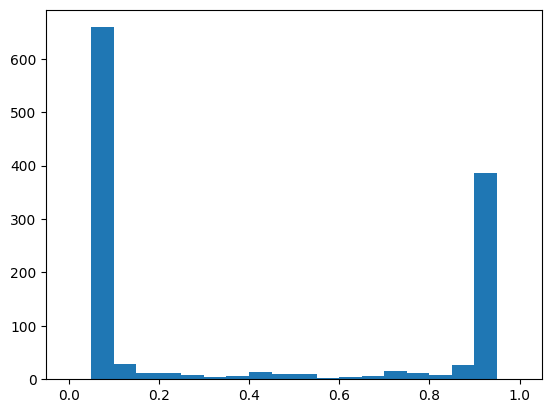

In [21]:
plt.hist(sess.get_pika_roi_confidence(plane), bins=np.arange(0, 1.05, 0.05))

In [22]:
np.mean(sess.get_pika_roi_confidence(plane=plane))

0.40626088575367564

In [23]:
pika_roi_ids = sess.get_pika_roi_ids(plane)
print('\npika roi ids of first 50 rois:\n')
print(pika_roi_ids[0:50])


pika roi ids of first 50 rois:

['795018579_0000', '795018579_0001', '795018579_0002', '795018579_0003', '795018579_0004', '795018579_0005', '795018579_0006', '795018579_0007', '795018579_0008', '795018579_0009', '795018579_0010', '795018579_0011', '795018579_0012', '795018579_0013', '795018579_0014', '795018579_0015', '795018579_0016', '795018579_0017', '795018579_0018', '795018579_0019', '795018579_0020', '795018579_0021', '795018579_0022', '795018579_0023', '795018579_0024', '795018579_0025', '795018579_0026', '795018579_0027', '795018579_0028', '795018579_0029', '795018579_0030', '795018579_0031', '795018579_0032', '795018579_0033', '795018579_0034', '795018579_0035', '795018579_0036', '795018579_0037', '795018579_0038', '795018579_0039', '795018579_0040', '795018579_0041', '795018579_0042', '795018579_0043', '795018579_0044', '795018579_0045', '795018579_0046', '795018579_0047', '795018579_0048', '795018579_0049']


### Select one roi

In [24]:
roi = 86

### From the file object, plane name, and roi name, get the PIKA roi_id

In [25]:
sess.get_pika_roi_id(plane, roi)

'795018579_0086'

### From the file object, plane name, and roi name, get the classification score
The original roi segmentation was performed using [Suite2P](https://github.com/MouseLand/suite2p). The resulting roi set were further classified by a classifer trained by team PIKA using human labeling as the training dataset. For each roi, the classifier return a score between 0 and 1, with higher score representing higher likelyhood of this roi being a cell soma. Team PIKA uses a threshold of 0.5 to generate binary classification result.

In [26]:
sess.get_pika_roi_confidence(plane, roi)

0.9166439970334372

### From the file object, plane name, and roi name, get the binary roi mask

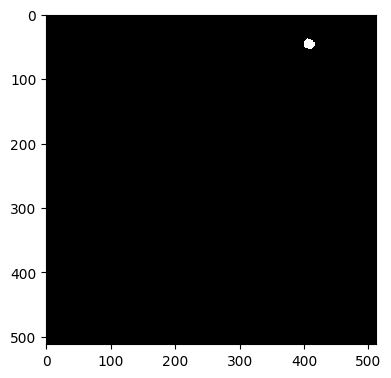

In [27]:
mask = sess.get_roi_image_mask(plane, roi)
fig, ax = plt.subplots(figsize=(4, 4))
ax.imshow(mask, interpolation='nearest', cmap='gray')
fig.tight_layout()

In [28]:
mask

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

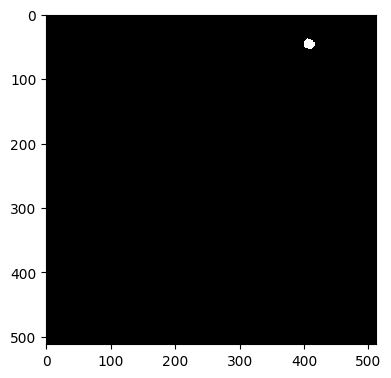

In [29]:
fig, ax = plt.subplots(figsize=(4, 4))
mask = sess.get_roi_image_mask(plane, roi)
ax.imshow(mask, interpolation='nearest', cmap='gray')
fig.tight_layout()

### From the file object, plane name, and roi name, get the activity trace for this roi
The raw fluorecence traces went through a series of processing: 1) demixed; 2) neuropil subtraction; 3) dF/F calculation; and 4) l0 event extraction. All these types of traces can be retrieved from the nwb file. 

**Please note all the traces were based from the raw movies not the denoised movies.**

#### Trace type:
 * `raw` : raw fluorecence trace
 * `neuropil` : raw neuropil trace, used for neuropil subtraction
 * `demixed` : demixed trace
 * `subtracted` : neuropil-subtracted trace
 * `dff` : dF/F trace
 * `events` : L0 event rate trace
 
The function returns both the trace and the timestamps in seconds of the trace.

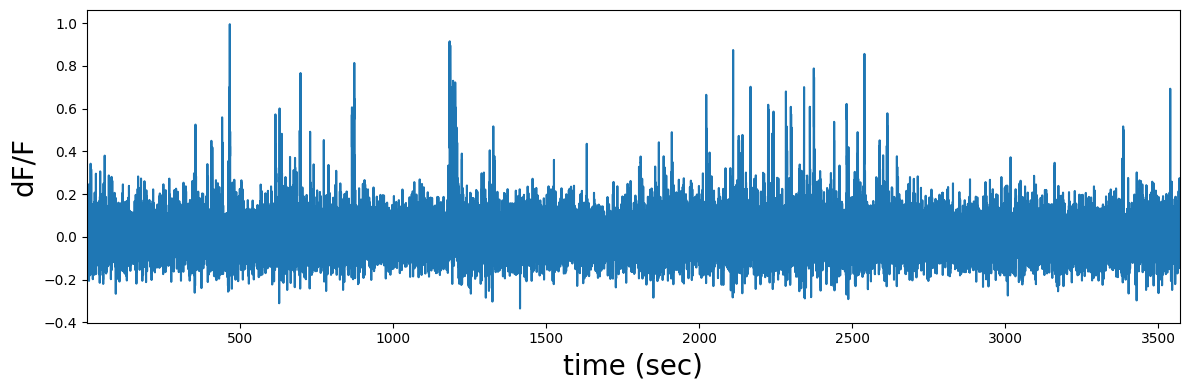

In [30]:
dff = sess.get_traces(plane, trace_type="dff").sel(roi=roi)
# If roi is not specified, traces from all ROIs are returned in an array of shape (n_rois, trace_len) where len(ts) = trace_len

fig, ax = plt.subplots(figsize=(12, 4))
ax.plot(dff.time, dff)
ax.set_xlabel("time (sec)", fontsize=20)
ax.set_ylabel("dF/F", fontsize=20)
ax.set_xlim(dff.time.min(), dff.time.max())
fig.tight_layout()

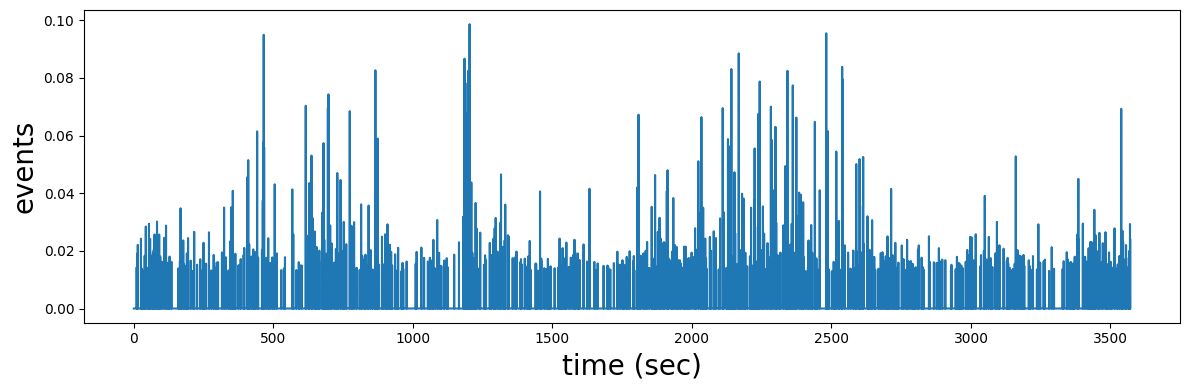

In [31]:
events = sess.get_traces(plane, trace_type="events").sel(roi=roi)

fig, ax = plt.subplots(figsize=(12, 4))
ax.plot(events.time, events)
ax.set_xlabel('time (sec)', fontsize=20)
ax.set_ylabel('events', fontsize=20)
fig.tight_layout()

# Running speed

In [32]:
sess.get_running_speed()

(array([-3.3044698 , -1.7311405 ,  0.37501746, ..., -0.05854691,
         1.0535287 ,  1.9894023 ], dtype=float32),
 array([  52.5967 ,   52.61287,   52.62953, ..., 3539.44946, 3539.46614,
        3539.48283]))

Text(0, 0.5, 'Running speed (cm/s)')

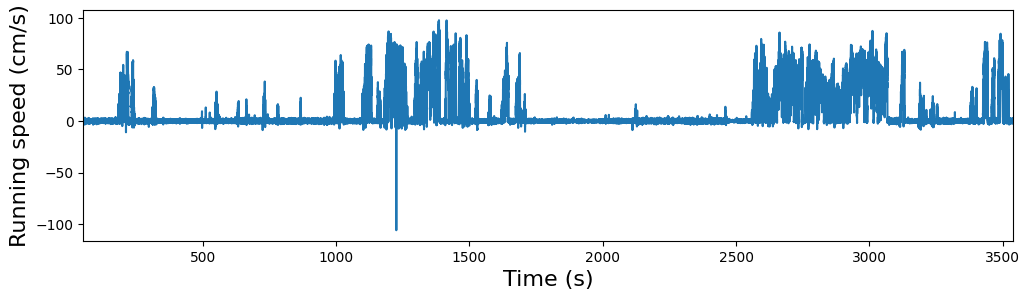

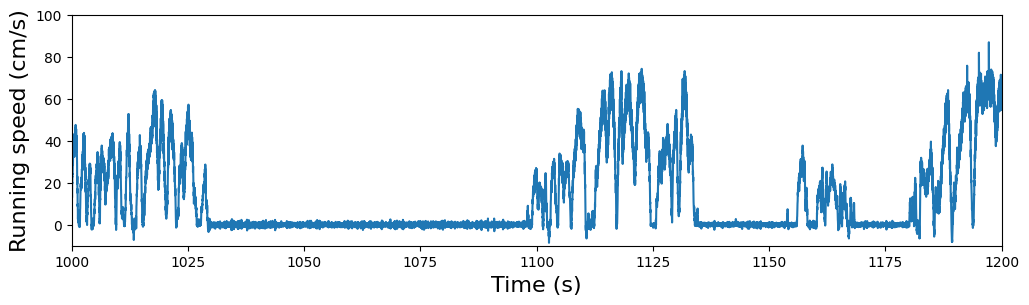

In [33]:
running_speed = sess.get_running_speed()

# Plot the full traces
plt.figure(figsize=(12, 3))
plt.plot(running_speed.time, running_speed)
plt.xlabel("Time (s)", fontsize=16)
plt.ylabel("Running speed (cm/s)", fontsize=16)
plt.xlim(running_speed.time.min(), running_speed.time.max())

# Zoomed in to a particular part
plt.figure(figsize=(12, 3))
plt.plot(running_speed.time, running_speed)
plt.xlim(1000, 1200)
plt.ylim(-10, 100)
plt.xlabel("Time (s)", fontsize=16)
plt.ylabel("Running speed (cm/s)", fontsize=16)